# surname-origin // Notebook Demo

This is a demo notebook for a PyTorch implementation of a vanilla recurrent neural network (RNN) character model that classifies the country of origin of a given surname.

Before starting we'll need to append the `'./src'` path to `sys.path` so that we can import the source code, based upon running this notebook from the root directory.

In [1]:
import sys
import os

sys.path.append(os.path.join('.', 'src'))

In [2]:
# Import modules from src directory.
import app
import utils

import matplotlib.pyplot as plt
%matplotlib inline

First, extract the names for different languages (each language with its own distinct `.txt` file) from `./data/names`, using the `utils.TextFileLoader` class. Then generate a dictionary of the data using its `.createDict()` method.

In [3]:
loader = utils.TextFileLoader(os.path.join('data', 'names'))
data = loader.createDict()

# Print the first ten surnames of the dataset designated as Greek.
print(data['Greek'][:10])

['Adamidis', 'Adamou', 'Agelakos', 'Akrivopoulos', 'Alexandropoulos', 'Anetakis', 'Angelopoulos', 'Antimisiaris', 'Antipas', 'Antonakos']


Then load this data into the `src.ModelHandler` class. We need to specify a string containing each of the allowed ASCII characters (which can be pulled from a static variable in `utils.TextFileLoader`), along with the number of hidden layers for the RNN model.

In [4]:
handler = app.ModelHandler(data, loader.all_letters, n_hidden=128)

# Print allowed characters.
print('Allowed characters for model: {}'.format(loader.all_letters))

Allowed characters for model: abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'


Now we train the model. It'll pick a random name from the training set along with its ground truth language to conduct backprop with for a defined number of iterations.

In [5]:
losses = handler.train(n_iter=10000, learning_rate=0.005)
y_raw = [i[1] for i in losses]

Completed training iteration 0
Completed training iteration 1000
Completed training iteration 2000
Completed training iteration 3000
Completed training iteration 4000
Completed training iteration 5000
Completed training iteration 6000
Completed training iteration 7000
Completed training iteration 8000
Completed training iteration 9000


Now we can plot a moving average of the loss on each training example for each iteration.

In [6]:
def moving_average(y_array, n_average=10):
    # Initialise iteration number list, moving average list, and counter utility variable.
    iter_x = list()
    average_y = list()
    i = 0
    
    try:
        while True:
            # Get the sample for this average.
            sample_i = y_array[i*n_average : (i+1)*n_average]
            # Calculate average (sum / count).
            avg_i = sum(sample_i) / float(len(sample_i))
            # Update x and y.
            average_y.append(avg_i)
            iter_x.append(i * n_average + 1)
            i += 1
    except(IndexError, ZeroDivisionError) as e:
        return iter_x, average_y

In [7]:
# Process a 100-step moving average of the training results.
x, y = moving_average(y_raw, n_average=100)

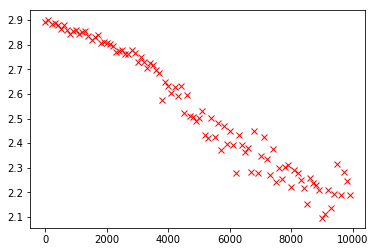

In [8]:
plt.plot(x, y, 'rx')

We can see here a reduction in the loss on the prediction of each training sample upon successive training iterations of the network, albeit with an increasing variance.

Finally, let's see how we can see how well this model predicts after the short spell of 10,000 training iterations. We'll invoke the `.predict()` method with the name *Konstantinidis*, which has a ground truth category of *Greek*. This method will print the top predictions and the negative log-likelihood (NLL) for each prediction. A higher NLL means greater confidence.

In [9]:
handler.predict('Konstantinidis', top_predictions=3)

Top 3 origin predictions for Konstantinidis:
(-0.45) Greek
(-2.30) Russian
(-3.11) Dutch


[[-0.4467495381832123, 'Greek'],
 [-2.3039028644561768, 'Russian'],
 [-3.1149098873138428, 'Dutch']]

We can see that the RNN comfortably predicts *Konstantinidis* correctly.